## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9633610	total: 58.5ms	remaining: 58.5s
1:	learn: 0.9436770	total: 59.5ms	remaining: 29.7s
2:	learn: 0.9246606	total: 60.5ms	remaining: 20.1s
3:	learn: 0.9091100	total: 61.6ms	remaining: 15.3s
4:	learn: 0.8938265	total: 62.5ms	remaining: 12.4s
5:	learn: 0.8771075	total: 63.5ms	remaining: 10.5s
6:	learn: 0.8608954	total: 64.6ms	remaining: 9.16s
7:	learn: 0.8453827	total: 65.4ms	remaining: 8.11s
8:	learn: 0.8309177	total: 66.2ms	remaining: 7.29s
9:	learn: 0.8156580	total: 67.1ms	remaining: 6.64s
10:	learn: 0.7999388	total: 68ms	remaining: 6.11s
11:	learn: 0.7857449	total: 68.7ms	remaining: 5.66s
12:	learn: 0.7712106	total: 69.7ms	remaining: 5.29s
13:	learn: 0.7566970	total: 70.5ms	remaining: 4.97s
14:	learn: 0.7427602	total: 71.4ms	remaining: 4.69s
15:	learn: 0.7287787	total: 72.1ms	remaining: 4.43s
16:	learn: 0.7149930	total: 73ms	remaining: 4.22s
17:	learn: 0.7040083	total: 73.8ms	remaining: 4.02s
18:	learn: 0.6920968	total: 74.6ms	remaining: 3.

57:	learn: 0.4216988	total: 107ms	remaining: 1.74s
58:	learn: 0.4180723	total: 108ms	remaining: 1.73s
59:	learn: 0.4146695	total: 109ms	remaining: 1.71s
60:	learn: 0.4109043	total: 110ms	remaining: 1.69s
61:	learn: 0.4076907	total: 111ms	remaining: 1.67s
62:	learn: 0.4037005	total: 111ms	remaining: 1.66s
63:	learn: 0.4001129	total: 112ms	remaining: 1.64s
64:	learn: 0.3970247	total: 113ms	remaining: 1.63s
65:	learn: 0.3942137	total: 114ms	remaining: 1.61s
66:	learn: 0.3906308	total: 115ms	remaining: 1.6s
67:	learn: 0.3878346	total: 116ms	remaining: 1.58s
68:	learn: 0.3846123	total: 116ms	remaining: 1.57s
69:	learn: 0.3817416	total: 117ms	remaining: 1.55s
70:	learn: 0.3788564	total: 118ms	remaining: 1.54s
71:	learn: 0.3767511	total: 119ms	remaining: 1.53s
72:	learn: 0.3743666	total: 120ms	remaining: 1.52s
73:	learn: 0.3715868	total: 120ms	remaining: 1.5s
74:	learn: 0.3684650	total: 121ms	remaining: 1.49s
75:	learn: 0.3665508	total: 122ms	remaining: 1.49s
76:	learn: 0.3630981	total: 123ms

159:	learn: 0.2570088	total: 192ms	remaining: 1.01s
160:	learn: 0.2562033	total: 193ms	remaining: 1s
161:	learn: 0.2556619	total: 194ms	remaining: 1s
162:	learn: 0.2550034	total: 195ms	remaining: 999ms
163:	learn: 0.2540095	total: 195ms	remaining: 996ms
164:	learn: 0.2535770	total: 196ms	remaining: 992ms
165:	learn: 0.2528881	total: 197ms	remaining: 990ms
166:	learn: 0.2524043	total: 198ms	remaining: 987ms
167:	learn: 0.2516787	total: 199ms	remaining: 984ms
168:	learn: 0.2508677	total: 199ms	remaining: 981ms
169:	learn: 0.2503752	total: 200ms	remaining: 978ms
170:	learn: 0.2497607	total: 201ms	remaining: 975ms
171:	learn: 0.2491025	total: 202ms	remaining: 972ms
172:	learn: 0.2482775	total: 203ms	remaining: 969ms
173:	learn: 0.2473052	total: 204ms	remaining: 967ms
174:	learn: 0.2467757	total: 204ms	remaining: 963ms
175:	learn: 0.2461686	total: 205ms	remaining: 960ms
176:	learn: 0.2452702	total: 206ms	remaining: 958ms
177:	learn: 0.2447336	total: 207ms	remaining: 955ms
178:	learn: 0.2445

285:	learn: 0.1920726	total: 298ms	remaining: 743ms
286:	learn: 0.1919811	total: 299ms	remaining: 742ms
287:	learn: 0.1915244	total: 299ms	remaining: 740ms
288:	learn: 0.1909541	total: 300ms	remaining: 739ms
289:	learn: 0.1905318	total: 302ms	remaining: 739ms
290:	learn: 0.1902962	total: 303ms	remaining: 738ms
291:	learn: 0.1897792	total: 304ms	remaining: 736ms
292:	learn: 0.1893859	total: 304ms	remaining: 734ms
293:	learn: 0.1893051	total: 305ms	remaining: 733ms
294:	learn: 0.1889367	total: 306ms	remaining: 731ms
295:	learn: 0.1886709	total: 307ms	remaining: 730ms
296:	learn: 0.1886167	total: 308ms	remaining: 728ms
297:	learn: 0.1881475	total: 308ms	remaining: 727ms
298:	learn: 0.1878884	total: 309ms	remaining: 725ms
299:	learn: 0.1873902	total: 310ms	remaining: 724ms
300:	learn: 0.1869889	total: 311ms	remaining: 722ms
301:	learn: 0.1866001	total: 312ms	remaining: 721ms
302:	learn: 0.1860858	total: 313ms	remaining: 719ms
303:	learn: 0.1857644	total: 313ms	remaining: 718ms
304:	learn: 

381:	learn: 0.1599279	total: 383ms	remaining: 619ms
382:	learn: 0.1596803	total: 384ms	remaining: 618ms
383:	learn: 0.1595407	total: 384ms	remaining: 617ms
384:	learn: 0.1591714	total: 385ms	remaining: 615ms
385:	learn: 0.1588464	total: 386ms	remaining: 614ms
386:	learn: 0.1584851	total: 387ms	remaining: 613ms
387:	learn: 0.1582084	total: 388ms	remaining: 612ms
388:	learn: 0.1579791	total: 389ms	remaining: 611ms
389:	learn: 0.1576498	total: 390ms	remaining: 609ms
390:	learn: 0.1573811	total: 390ms	remaining: 608ms
391:	learn: 0.1570142	total: 391ms	remaining: 607ms
392:	learn: 0.1567356	total: 392ms	remaining: 605ms
393:	learn: 0.1564073	total: 393ms	remaining: 604ms
394:	learn: 0.1559916	total: 394ms	remaining: 603ms
395:	learn: 0.1557812	total: 394ms	remaining: 601ms
396:	learn: 0.1554805	total: 395ms	remaining: 600ms
397:	learn: 0.1552665	total: 396ms	remaining: 599ms
398:	learn: 0.1551774	total: 397ms	remaining: 597ms
399:	learn: 0.1548943	total: 397ms	remaining: 596ms
400:	learn: 

506:	learn: 0.1301230	total: 488ms	remaining: 475ms
507:	learn: 0.1298567	total: 489ms	remaining: 474ms
508:	learn: 0.1295862	total: 490ms	remaining: 473ms
509:	learn: 0.1294325	total: 491ms	remaining: 471ms
510:	learn: 0.1292993	total: 492ms	remaining: 470ms
511:	learn: 0.1290202	total: 492ms	remaining: 469ms
512:	learn: 0.1288483	total: 493ms	remaining: 468ms
513:	learn: 0.1286153	total: 494ms	remaining: 467ms
514:	learn: 0.1283114	total: 495ms	remaining: 466ms
515:	learn: 0.1280762	total: 496ms	remaining: 465ms
516:	learn: 0.1278479	total: 497ms	remaining: 464ms
517:	learn: 0.1275147	total: 497ms	remaining: 463ms
518:	learn: 0.1274301	total: 498ms	remaining: 462ms
519:	learn: 0.1272671	total: 499ms	remaining: 460ms
520:	learn: 0.1270931	total: 500ms	remaining: 459ms
521:	learn: 0.1269099	total: 500ms	remaining: 458ms
522:	learn: 0.1266633	total: 501ms	remaining: 457ms
523:	learn: 0.1264692	total: 502ms	remaining: 456ms
524:	learn: 0.1261648	total: 503ms	remaining: 455ms
525:	learn: 

609:	learn: 0.1114552	total: 574ms	remaining: 367ms
610:	learn: 0.1112353	total: 574ms	remaining: 366ms
611:	learn: 0.1109073	total: 575ms	remaining: 365ms
612:	learn: 0.1107723	total: 576ms	remaining: 364ms
613:	learn: 0.1106441	total: 577ms	remaining: 363ms
614:	learn: 0.1103981	total: 578ms	remaining: 362ms
615:	learn: 0.1103543	total: 579ms	remaining: 361ms
616:	learn: 0.1101107	total: 580ms	remaining: 360ms
617:	learn: 0.1098355	total: 581ms	remaining: 359ms
618:	learn: 0.1096798	total: 581ms	remaining: 358ms
619:	learn: 0.1096002	total: 582ms	remaining: 357ms
620:	learn: 0.1094667	total: 583ms	remaining: 356ms
621:	learn: 0.1092635	total: 584ms	remaining: 355ms
622:	learn: 0.1091496	total: 584ms	remaining: 354ms
623:	learn: 0.1089665	total: 585ms	remaining: 353ms
624:	learn: 0.1087050	total: 586ms	remaining: 352ms
625:	learn: 0.1086363	total: 587ms	remaining: 351ms
626:	learn: 0.1084442	total: 588ms	remaining: 350ms
627:	learn: 0.1082554	total: 588ms	remaining: 349ms
628:	learn: 

735:	learn: 0.0921334	total: 678ms	remaining: 243ms
736:	learn: 0.0920398	total: 679ms	remaining: 242ms
737:	learn: 0.0919484	total: 680ms	remaining: 241ms
738:	learn: 0.0918331	total: 681ms	remaining: 240ms
739:	learn: 0.0917760	total: 682ms	remaining: 239ms
740:	learn: 0.0915316	total: 682ms	remaining: 238ms
741:	learn: 0.0912889	total: 683ms	remaining: 238ms
742:	learn: 0.0911301	total: 684ms	remaining: 237ms
743:	learn: 0.0909673	total: 685ms	remaining: 236ms
744:	learn: 0.0908353	total: 686ms	remaining: 235ms
745:	learn: 0.0906782	total: 686ms	remaining: 234ms
746:	learn: 0.0905157	total: 687ms	remaining: 233ms
747:	learn: 0.0904384	total: 688ms	remaining: 232ms
748:	learn: 0.0903594	total: 689ms	remaining: 231ms
749:	learn: 0.0902194	total: 690ms	remaining: 230ms
750:	learn: 0.0900817	total: 691ms	remaining: 229ms
751:	learn: 0.0899812	total: 691ms	remaining: 228ms
752:	learn: 0.0898784	total: 692ms	remaining: 227ms
753:	learn: 0.0898110	total: 693ms	remaining: 226ms
754:	learn: 

839:	learn: 0.0793533	total: 764ms	remaining: 146ms
840:	learn: 0.0791677	total: 765ms	remaining: 145ms
841:	learn: 0.0790254	total: 766ms	remaining: 144ms
842:	learn: 0.0788764	total: 767ms	remaining: 143ms
843:	learn: 0.0786998	total: 767ms	remaining: 142ms
844:	learn: 0.0786418	total: 768ms	remaining: 141ms
845:	learn: 0.0785605	total: 769ms	remaining: 140ms
846:	learn: 0.0784885	total: 770ms	remaining: 139ms
847:	learn: 0.0784354	total: 771ms	remaining: 138ms
848:	learn: 0.0783218	total: 771ms	remaining: 137ms
849:	learn: 0.0781845	total: 772ms	remaining: 136ms
850:	learn: 0.0781483	total: 773ms	remaining: 135ms
851:	learn: 0.0780775	total: 774ms	remaining: 134ms
852:	learn: 0.0780348	total: 774ms	remaining: 133ms
853:	learn: 0.0779248	total: 775ms	remaining: 133ms
854:	learn: 0.0778571	total: 777ms	remaining: 132ms
855:	learn: 0.0777415	total: 777ms	remaining: 131ms
856:	learn: 0.0776451	total: 778ms	remaining: 130ms
857:	learn: 0.0775693	total: 779ms	remaining: 129ms
858:	learn: 

963:	learn: 0.0669441	total: 869ms	remaining: 32.4ms
964:	learn: 0.0668105	total: 870ms	remaining: 31.5ms
965:	learn: 0.0667472	total: 870ms	remaining: 30.6ms
966:	learn: 0.0667156	total: 871ms	remaining: 29.7ms
967:	learn: 0.0666108	total: 872ms	remaining: 28.8ms
968:	learn: 0.0665258	total: 873ms	remaining: 27.9ms
969:	learn: 0.0663974	total: 874ms	remaining: 27ms
970:	learn: 0.0663536	total: 875ms	remaining: 26.1ms
971:	learn: 0.0663325	total: 876ms	remaining: 25.2ms
972:	learn: 0.0662746	total: 876ms	remaining: 24.3ms
973:	learn: 0.0662522	total: 877ms	remaining: 23.4ms
974:	learn: 0.0661599	total: 878ms	remaining: 22.5ms
975:	learn: 0.0661174	total: 879ms	remaining: 21.6ms
976:	learn: 0.0660268	total: 880ms	remaining: 20.7ms
977:	learn: 0.0659855	total: 881ms	remaining: 19.8ms
978:	learn: 0.0659433	total: 881ms	remaining: 18.9ms
979:	learn: 0.0658831	total: 882ms	remaining: 18ms
980:	learn: 0.0658068	total: 883ms	remaining: 17.1ms
981:	learn: 0.0656893	total: 884ms	remaining: 16.2

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

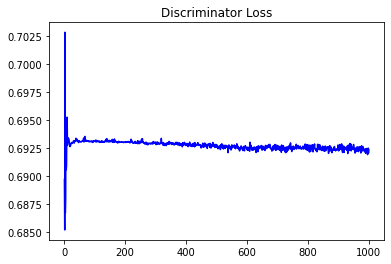

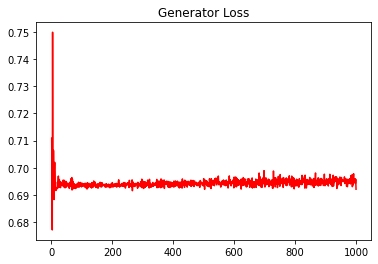

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.13497112252696536


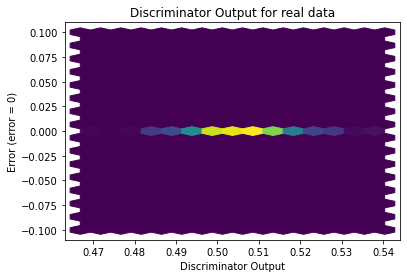

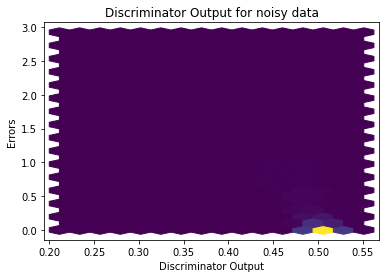

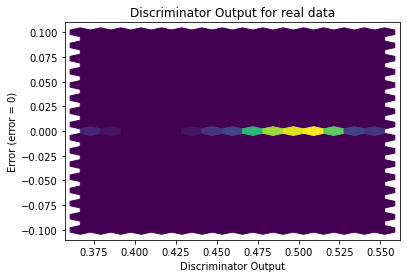

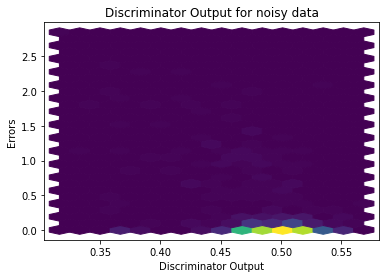

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


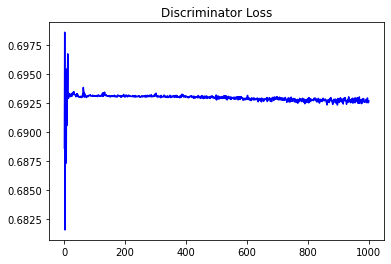

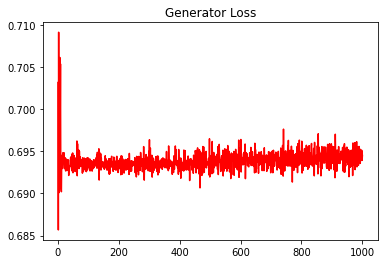

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.13329876573368796


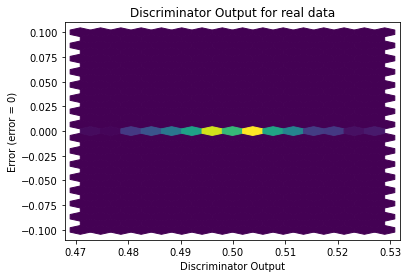

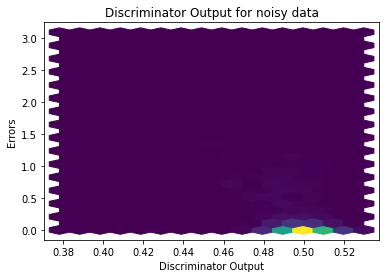

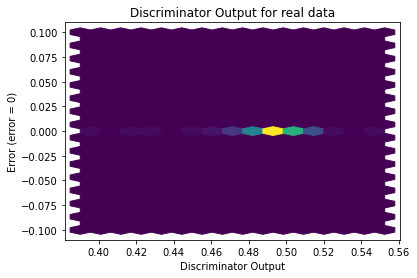

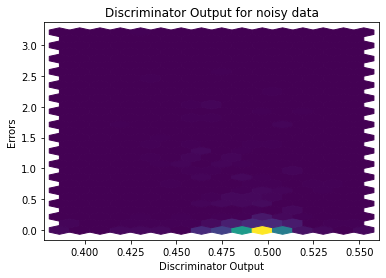

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5473]], requires_grad=True)
